In [1]:
import sys
import h5py
sys.path.append("/users/munozr/mycodes")
import numpy as np
import matplotlib.pyplot as plt
from data_analysis_codes.tools import ReadingTools as RRead
import pandas as pd

In [2]:
#param = RRead.read_parameters('pflrw_d3e2_L1206_t1_N64_EdS_GRH_CPunc_MR')
param = RRead.read_parameters('pflrw_d3e2_L1206_t1_N32_EdS_GRH_spin_CPunc_MR')

In [3]:
files = RRead.BASH('ls '+param['datapath']+'*.h5').split('\n')
files_kept = [fl for fl in files if 'checkpoint' not in fl]
files_kept = [fl for fl in files if 'NaN' not in fl]

In [4]:
f0 = h5py.File(files_kept[0],'r')
f1 = h5py.File(files_kept[1],'r')
f2 = h5py.File(files_kept[2],'r')
f3 = h5py.File(files_kept[3],'r')
f4 = h5py.File(files_kept[4],'r')
f5 = h5py.File(files_kept[5],'r')
f6 = h5py.File(files_kept[6],'r')
f7 = h5py.File(files_kept[7],'r')

In [5]:
def mpi_merge(sectioned_data):
    sectioned_data_2a = np.append(sectioned_data[0], 
                                  sectioned_data[1],
                                  axis=2)
    sectioned_data_2b = np.append(sectioned_data[2], 
                                  sectioned_data[3], 
                                  axis=2)
    sectioned_data_2c = np.append(sectioned_data[4], 
                                  sectioned_data[5], 
                                  axis=2)
    sectioned_data_2d = np.append(sectioned_data[6], 
                                  sectioned_data[7], 
                                  axis=2)
    sectioned_data_1a = np.append(sectioned_data_2a,
                                  sectioned_data_2b, 
                                  axis=1)
    sectioned_data_1b = np.append(sectioned_data_2c,
                                  sectioned_data_2d, 
                                  axis=1)
    unsectioned_data = np.append(sectioned_data_1a,
                                 sectioned_data_1b,
                                 axis=0)
    return unsectioned_data

In [6]:
nbrlv = 4
iG = 3
data = {}
for lv in range(nbrlv):
    lv = str(lv)
    sectioned_data = []
    for f in [f0, f1, f2, f3, f4, f5, f6, f7]:
        filekeysall = list(f.keys())
        filekeys = [key for key in filekeysall if 'kxx it=0 tl=0 rl='+lv in key]
        sectioned_data += [np.array(f[filekeys[0]])[iG:-iG,iG:-iG,iG:-iG]]
    data[lv] = mpi_merge(sectioned_data)

In [7]:
N = []
for lv in range(nbrlv):
    N += [np.shape(data[str(lv)])[0]]
N

[64, 65, 61, 53]

N =  [64, 65, 61, 53]


"\ndx4 = dx3/2\nL4 = N[4]*dx4\nshift = dx4/2\nx4 = np.linspace(cent-L4/2+shift, cent+L4/2-dx4+shift, N[4])\nxmin = np.min(x4)\nxmax = np.max(x4)\nx4, y4 = np.meshgrid(x4,x4, indexing = 'ij')\nplt.scatter(x4,y4, c=data['4'][:,:,int(N[4]/4)], s = s/81, vmin=-1.63e-5, vmax=-1.49e-5)\nplt.plot([xmin,xmax,xmax,xmin,xmin],\n         [xmin,xmin,xmax,xmax,xmin], color='C1', linewidth=lw, linestyle='--')\nr = r/2\nplt.plot([cent-r,cent+r,cent+r,cent-r,cent-r],\n         [cent-r,cent-r,cent+r,cent+r,cent-r], color='C3', linewidth=lw)\n"

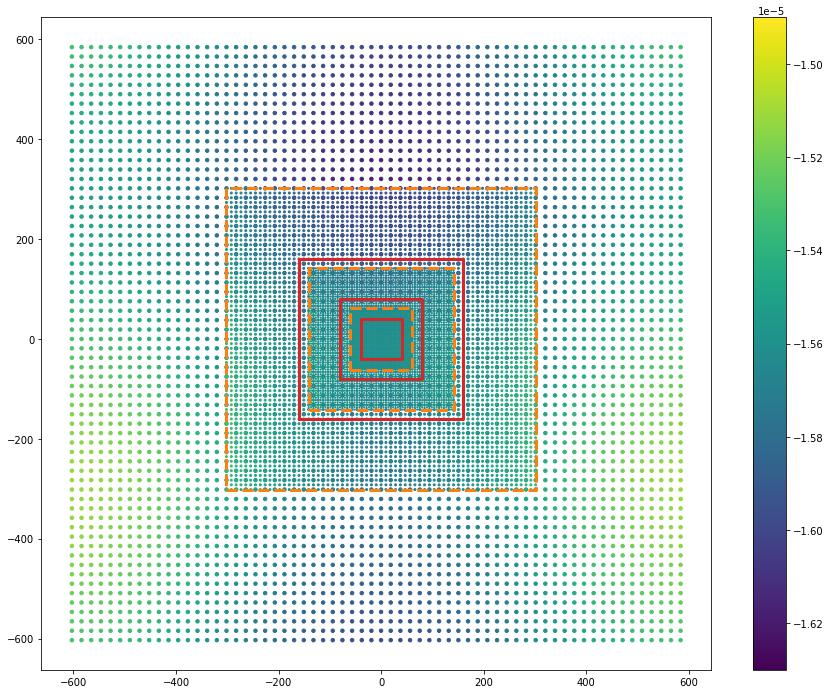

In [8]:
print('N = ', N)
L = 1206
cent = 0.0 #-L/4
s = 12
lw = 3

plt.figure(figsize = (15,12))

plt.scatter([cent], [cent], marker='x', s = 200)

dx = L/N[0]
x0 = np.linspace(-L/2, L/2-dx, N[0])
x0, y0 = np.meshgrid(x0,x0, indexing = 'ij')
plt.scatter(x0,y0, c=data['0'][:,:,int(N[0]/4)], s = s, vmin=-1.63e-5, vmax=-1.49e-5)
plt.colorbar()

dx1 = dx/2
L1 = N[1]*dx1
shift = dx1/2
x1 = np.linspace(cent-L1/2+shift, cent+L1/2-dx1+shift, N[1])
xmin = np.min(x1)
xmax = np.max(x1)
x1, y1 = np.meshgrid(x1,x1, indexing = 'ij')
plt.scatter(x1,y1, c=data['1'][:,:,int(N[1]/4)], s = s/3, vmin=-1.63e-5, vmax=-1.49e-5)
plt.plot([xmin,xmax,xmax,xmin,xmin],
         [xmin,xmin,xmax,xmax,xmin], color='C1', linewidth=lw, linestyle='--')
r = 160
plt.plot([cent-r,cent+r,cent+r,cent-r,cent-r],
         [cent-r,cent-r,cent+r,cent+r,cent-r], color='C3', linewidth=lw)

dx2 = dx1/2
L2 = N[2]*dx2
shift = dx2/2
x2 = np.linspace(cent-L2/2+shift, cent+L2/2-dx2+shift, N[2])
xmin = np.min(x2)
xmax = np.max(x2)
x2, y2 = np.meshgrid(x2,x2, indexing = 'ij')
plt.scatter(x2,y2, c=data['2'][:,:,int(N[2]/4)], s = s/9, vmin=-1.63e-5, vmax=-1.49e-5)
plt.plot([xmin,xmax,xmax,xmin,xmin],
         [xmin,xmin,xmax,xmax,xmin], color='C1', linewidth=lw, linestyle='--')
r = r/2
plt.plot([cent-r,cent+r,cent+r,cent-r,cent-r],
         [cent-r,cent-r,cent+r,cent+r,cent-r], color='C3', linewidth=lw)

dx3 = dx2/2
L3 = N[3]*dx3
shift = dx3/2
x3 = np.linspace(cent-L3/2+shift, cent+L3/2-dx3+shift, N[3])
xmin = np.min(x3)
xmax = np.max(x3)
x3, y3 = np.meshgrid(x3,x3, indexing = 'ij')
plt.scatter(x3,y3, c=data['3'][:,:,int(N[3]/4)], s = s/27, vmin=-1.63e-5, vmax=-1.49e-5)
plt.plot([xmin,xmax,xmax,xmin,xmin],
         [xmin,xmin,xmax,xmax,xmin], color='C1', linewidth=lw, linestyle='--')
r = r/2
plt.plot([cent-r,cent+r,cent+r,cent-r,cent-r],
         [cent-r,cent-r,cent+r,cent+r,cent-r], color='C3', linewidth=lw)
"""
dx4 = dx3/2
L4 = N[4]*dx4
shift = dx4/2
x4 = np.linspace(cent-L4/2+shift, cent+L4/2-dx4+shift, N[4])
xmin = np.min(x4)
xmax = np.max(x4)
x4, y4 = np.meshgrid(x4,x4, indexing = 'ij')
plt.scatter(x4,y4, c=data['4'][:,:,int(N[4]/4)], s = s/81, vmin=-1.63e-5, vmax=-1.49e-5)
plt.plot([xmin,xmax,xmax,xmin,xmin],
         [xmin,xmin,xmax,xmax,xmin], color='C1', linewidth=lw, linestyle='--')
r = r/2
plt.plot([cent-r,cent+r,cent+r,cent-r,cent-r],
         [cent-r,cent-r,cent+r,cent+r,cent-r], color='C3', linewidth=lw)
"""
#plt.xlim(-610, 10)
#plt.ylim(-610, 10)
#plt.xlim(-400, -200)
#plt.ylim(-400, -200)
#plt.grid()

In [9]:
1206/32

37.6875